In [3]:
print(1)

1


In [4]:
#importing necessary libraries
import os
import cv2
from glob import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [5]:
train_path = 'rocks/'
#Setting Test dir paths        
test_path = 'rockstest/'

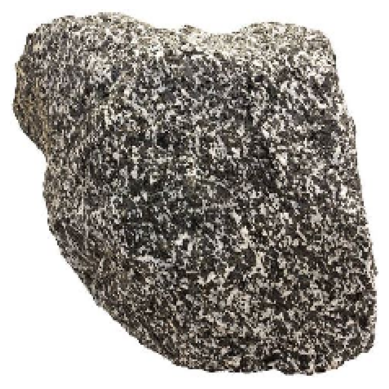

In [6]:
#Displaying the image
img = load_img(train_path + "Amphibolite/Amphibolite0.png", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

(227, 227, 3)


In [8]:
import os

def get_subfolders(directory):
    subfolders = [f.path for f in os.scandir(directory) if f.is_dir()]
    return subfolders

# Example usage:
directory_path = 'rocks'
subfolders_list = get_subfolders(directory_path)

print("Subfolders in", directory_path, ":", subfolders_list)


Subfolders in rocks : ['rocks\\Amphibolite', 'rocks\\Andesite', 'rocks\\Anthracite', 'rocks\\Basalt', 'rocks\\Blueschist', 'rocks\\Breccia', 'rocks\\Carbonatite', 'rocks\\Chalk', 'rocks\\Chert', 'rocks\\Coal', 'rocks\\Conglomerate', 'rocks\\Diamictite', 'rocks\\Dolomite', 'rocks\\Eclogite', 'rocks\\Evaporite', 'rocks\\Flint', 'rocks\\Gabbro', 'rocks\\Gneiss', 'rocks\\Granite', 'rocks\\Granulite', 'rocks\\Greenschist', 'rocks\\Greywacke', 'rocks\\Hornfels', 'rocks\\Komatiite', 'rocks\\Limestone', 'rocks\\Marble', 'rocks\\Migmatite', 'rocks\\Mudstone', 'rocks\\Obsidian', 'rocks\\Oil_shale', 'rocks\\Oolite', 'rocks\\Pegmatite', 'rocks\\Phyllite', 'rocks\\Porphyry', 'rocks\\Pumice', 'rocks\\Pyroxenite', 'rocks\\Quartzite', 'rocks\\Quartzolite', 'rocks\\Quartz_diorite', 'rocks\\Quartz_monzonite', 'rocks\\Rhyolite', 'rocks\\Sandstone', 'rocks\\Scoria', 'rocks\\Serpentinite', 'rocks\\Shale', 'rocks\\Siltstone', 'rocks\\Slate', 'rocks\\Talc_carbonate', 'rocks\\Tephrite', 'rocks\\Travertine', '

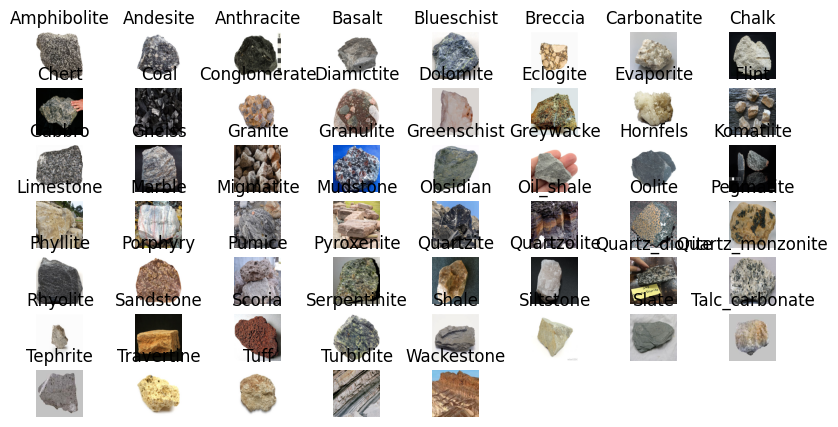

In [9]:
#Visualizing more Images from each class
images = ['Amphibolite', 'Andesite', 'Anthracite', 'Basalt', 'Blueschist', 'Breccia', 'Carbonatite', 'Chalk', 'Chert', 'Coal', 'Conglomerate', 'Diamictite', 'Dolomite', 'Eclogite', 'Evaporite', 'Flint', 'Gabbro', 'Gneiss', 'Granite', 'Granulite', 'Greenschist', 'Greywacke', 'Hornfels', 'Komatiite', 'Limestone', 'Marble', 'Migmatite', 'Mudstone', 'Obsidian', 'Oil_shale', 'Oolite', 'Pegmatite', 'Phyllite', 'Porphyry', 'Pumice', 'Pyroxenite', 'Quartzite', 'Quartzolite', 'Quartz_diorite', 'Quartz_monzonite', 'Rhyolite','Sandstone', 'Scoria', 'Serpentinite', 'Shale', 'Siltstone', 'Slate', 'Talc_carbonate', 'Tephrite', 'Travertine', 'Tuff', 'Turbidite', 'Wackestone']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(7,8,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    k=images[i]+'0.png'
    ax.imshow(load_img(train_path + images[i] +"/"+k, target_size=(227,227)))

In [10]:
#Getting the count of images for each class
image_count = []
class_names = []
print('{:18s}'.format('class'), end='')
print('Count:')
print('-' * 24)
#Reading the image from each folder from training path
for folder in os.listdir(train_path):
    folder_num = len(os.listdir(os.path.join(train_path,folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)
print('-' * 24)    
print("Number of classes : ",len(class_names))

class             Count:
------------------------
Amphibolite          36
Andesite             28
Anthracite           44
Basalt               50
Blueschist           32
Breccia              32
Carbonatite          44
Chalk                51
Chert                37
Coal                 45
Conglomerate         45
Diamictite           44
Dolomite             58
Eclogite             40
Evaporite            48
Flint                54
Gabbro               34
Gneiss               49
Granite              60
Granulite            51
Greenschist          44
Greywacke            31
Hornfels             25
Komatiite            54
Limestone            52
Marble               59
Migmatite            39
Mudstone             46
Obsidian             55
Oil_shale            36
Oolite               40
Pegmatite            37
Phyllite             26
Porphyry             46
Pumice               47
Pyroxenite           42
Quartzite            58
Quartzolite          55
Quartz_diorite       44
Quartz_monzoni

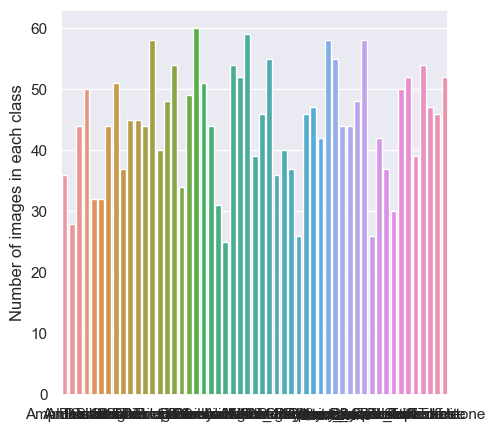

In [11]:
#Plotting the count of images for each class
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=class_names, y=image_count)
plt.ylabel('Number of images in each class')
plt.show()

In [12]:
#Finding number of classes
className = glob(train_path + '/*')
num_classes = len(className)
print(num_classes)

53


In [13]:
model = tf.keras.models.Sequential([
    #1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #Passing it to a Fully Connected layer
    tf.keras.layers.Flatten(),
    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    # 3rd Fully Connected Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    #Output Layer
    tf.keras.layers.Dense(53, activation='softmax'),
    #tf.keras.layers.BatchNormalization()
])

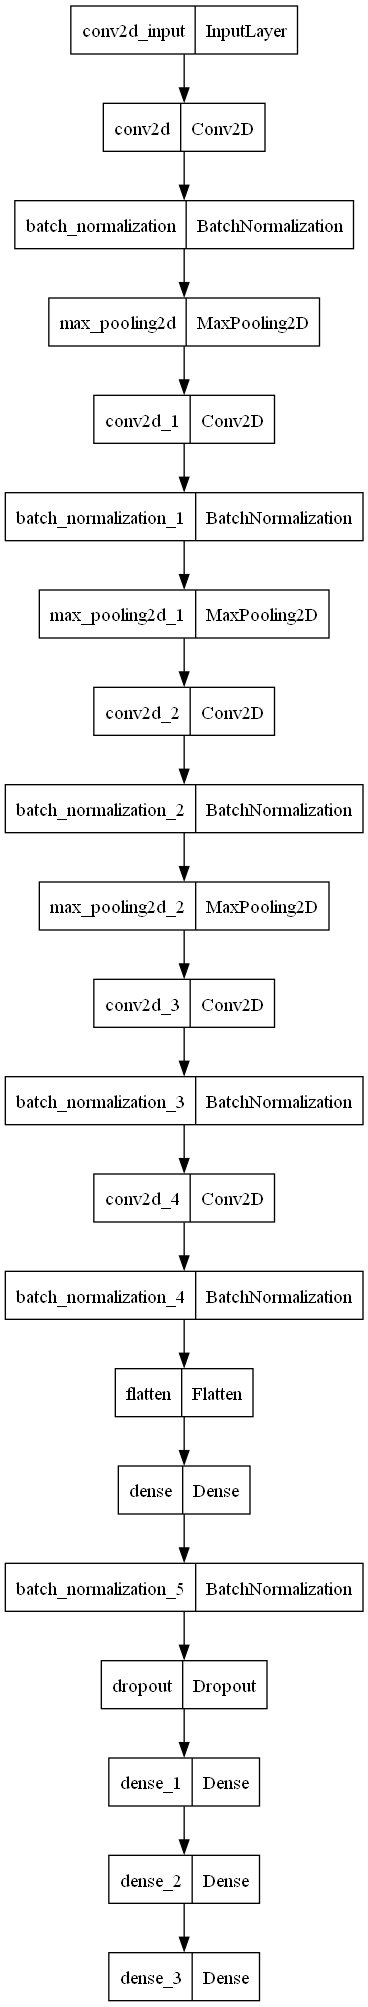

In [15]:
# plot graph
plot_model(model, to_file='rock_classification.png')

In [16]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
#Getting model's summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [17]:
#Specifing epochs & batch size
epochs = 40
batch_size = 16
image_height = 227
image_width = 227


In [18]:
train_datagen = ImageDataGenerator(rescale= 1./255,
rotation_range=10,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest')

#Creating an object of ImageDataGenerator for augmenting test dataset
test_datagen = ImageDataGenerator(rescale= 1./255)




In [19]:
train_generator = train_datagen.flow_from_directory(
directory = train_path, 
target_size= (image_height, image_width), # resize to this size
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical"
)

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size=(image_height, image_width),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

nb_train_samples = train_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())


Found 2343 images belonging to 53 classes.
Found 351 images belonging to 53 classes.


In [20]:
from keras.callbacks import ReduceLROnPlateau
#Callback to save the best model. Using checkpoint and earlystopping to monitor validation accuracy
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=10, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='fruit_model.h5',
        monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,verbose=1)
]

In [21]:
#Fitting the model
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=test_generator,
        verbose = 1,
        validation_steps=nb_test_samples // batch_size)



Epoch 1/40
146/146 [==============================] - ETA: 0s - loss: 4.7285 - accuracy: 0.0198
Epoch 1: val_accuracy improved from -inf to 0.02083, saving model to fruit_model.h5
146/146 [==============================] - 146s 988ms/step - loss: 4.7285 - accuracy: 0.0198 - val_loss: 4.0259 - val_accuracy: 0.0208 - lr: 1.0000e-05
Epoch 2/40
146/146 [==============================] - ETA: 0s - loss: 4.6904 - accuracy: 0.0219
Epoch 2: val_accuracy did not improve from 0.02083
146/146 [==============================] - 146s 1000ms/step - loss: 4.6904 - accuracy: 0.0219 - val_loss: 4.1873 - val_accuracy: 0.0060 - lr: 1.0000e-05
Epoch 3/40
146/146 [==============================] - ETA: 0s - loss: 4.6504 - accuracy: 0.0215
Epoch 3: val_accuracy did not improve from 0.02083
146/146 [==============================] - 148s 1s/step - loss: 4.6504 - accuracy: 0.0215 - val_loss: 4.2595 - val_accuracy: 0.0089 - lr: 1.0000e-05
Epoch 4/40
146/146 [==============================] - ETA: 0s - loss: 4.

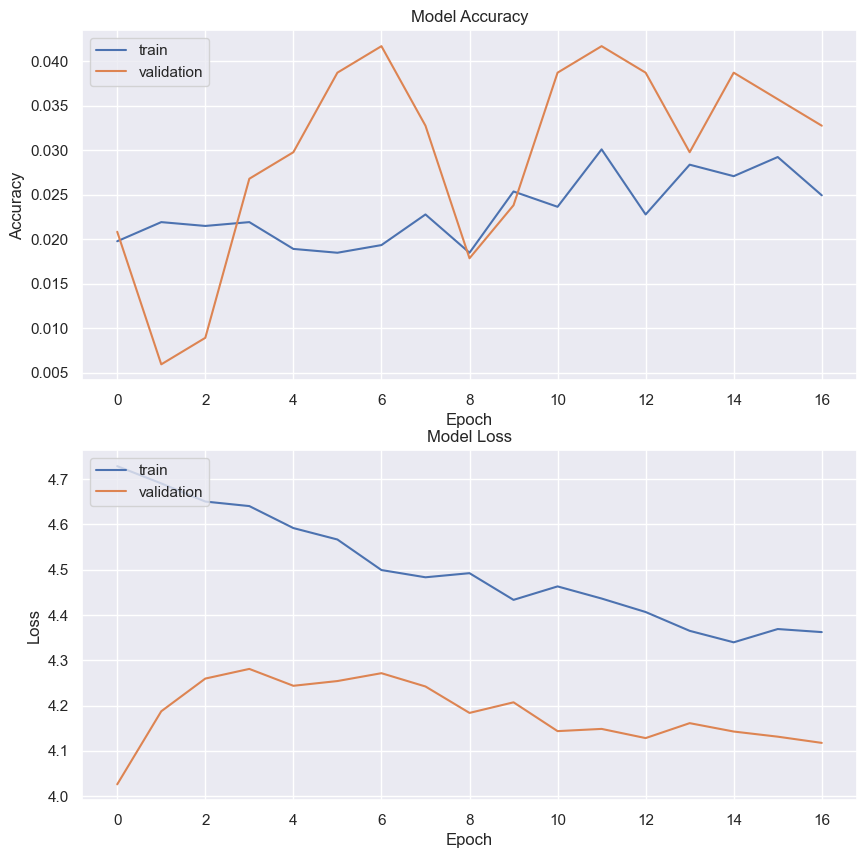

In [22]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [23]:
# model evaluation
score = model.evaluate(test_generator)
print('test loss:', score[0])
print('test accuracy:', score[1])

22/22 [==============================] - 4s 166ms/step - loss: 4.1177 - accuracy: 0.0342
test loss: 4.117650985717773
test accuracy: 0.03418803587555885


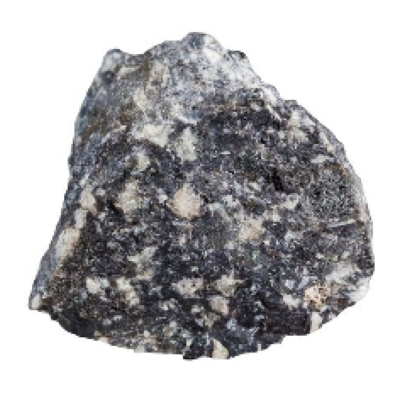

In [24]:
# save the whole model
model.save("./fruit_model.h5")
# make a prediction for a new image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
sample_path='rocks/'
img = load_img(sample_path + "Andesite/Andesite0.png", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()

In [25]:
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, color_mode="rgb", target_size=(227, 227, 3))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 227, 227, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
img = load_image(sample_path + "Flint/Flint0.png")
model = load_model('fruit_model.h5')

In [26]:
predict_x = model.predict(img)
result = np.argmax(predict_x, axis=1)[0]

if result[0] == 0:
    print("Amphibolite")
elif result[0] == 1:
    print("Andesite")
elif result[0] == 2:
    print("Anthracite")
elif result[0] == 3:
    print("Basalt")
elif result[0] == 4:
    print("Blueschist")
elif result[0] == 5:
    print("Breccia")
elif result[0] == 6:
    print("Carbonatite")
elif result[0] == 7:
    print("Chalk")
elif result[0] == 8:
    print("Chert")
elif result[0] == 9:
    print("Coal")
elif result[0] == 10:
    print("Conglomerate")
elif result[0] == 11:
    print("Diamictite")
elif result[0] == 12:
    print("Dolomite")
elif result[0] == 13:
    print("Eclogite")
elif result[0] == 14:
    print("Evaporite")
elif result[0] == 15:
    print("Flint")
elif result[0] == 16:
    print("Gabbro")
elif result[0] == 17:
    print("Gneiss")
elif result[0] == 18:
    print("Granite")
elif result[0] == 19:
    print("Granulite")
elif result[0] == 20:
    print("Greenschist")
elif result[0] == 21:
    print("Greywacke")
elif result[0] == 22:
    print("Hornfels")
elif result[0] == 23:
    print("Komatiite")
elif result[0] == 24:
    print("Limestone")
elif result[0] == 25:
    print("Marble")
elif result[0] == 26:
    print("Migmatite")
elif result[0] == 27:
    print("Mudstone")
elif result[0] == 28:
    print("Obsidian")
elif result[0] == 29:
    print("Oil_shale")
elif result[0] == 30:
    print("Oolite")
elif result[0] == 31:
    print("Pegmatite")
elif result[0] == 32:
    print("Phyllite")
elif result[0] == 33:
    print("Porphyry")
elif result[0] == 34:
    print("Pumice")
elif result[0] == 35:
    print("Pyroxenite")
elif result[0] == 36:
    print("Quartzite")
elif result[0] == 37:
    print("Quartzolite")
elif result[0] == 38:
    print("Quartz_diorite")
elif result[0] == 39:
    print("Quartz_monzonite")
elif result[0] == 40:
    print("Rhyolite")
elif result[0] == 41:
    print("Sandstone")
elif result[0] == 42:
    print("Scoria")
elif result[0] == 43:
    print("Serpentinite")
elif result[0] == 44:
    print("Shale")
elif result[0] == 45:
    print("Siltstone")
elif result[0] == 46:
    print("Slate")
elif result[0] == 47:
    print("Talc_carbonate")
elif result[0] == 48:
    print("Tephrite")
elif result[0] == 49:
    print("Travertine")
elif result[0] == 50:
    print("Tuff")
elif result[0] == 51:
    print("Turbidite")
elif result[0] == 52:
    print("Wackestone")
else:
    print("Not in the list")

1/1 [==============================] - 0s 221ms/step


IndexError: invalid index to scalar variable.

In [27]:
predict_x=model.predict(img)
result=np.argmax(predict_x,axis=1)
if result[0] == 0:
    print("Apple")
elif result[0] == 1:
    print("cabbage")
elif result[0] == 2:
    print("carrot")
elif result[0] == 3:
    print("cucumber")
elif result[0] == 4:
    print("eggplant")
elif result[0] == 5:
    print("pear")
elif result[0] == 6:
    print("zucchini")
else:
    print("Not in the list")

1/1 [==============================] - 0s 44ms/step
Not in the list


In [28]:
class_mapping = {
    0: 'Amphibolite',
    1: 'Andesite',
    2: 'Anthracite',
    3: 'Basalt',
    4: 'Blueschist',
    5: 'Breccia',
    6: 'Carbonatite',
    7: 'Chalk',
    8: 'Chert',
    9: 'Coal',
    10: 'Conglomerate',
    11: 'Diamictite',
    12: 'Dolomite',
    13: 'Eclogite',
    14: 'Evaporite',
    15: 'Flint',
    16: 'Gabbro',
    17: 'Gneiss',
    18: 'Granite',
    19: 'Granulite',
    20: 'Greenschist',
    21: 'Greywacke',
    22: 'Hornfels',
    23: 'Komatiite',
    24: 'Limestone',
    25: 'Marble',
    26: 'Migmatite',
    27: 'Mudstone',
    28: 'Obsidian',
    29: 'Oil_shale',
    30: 'Oolite',
    31: 'Pegmatite',
    32: 'Phyllite',
    33: 'Porphyry',
    34: 'Pumice',
    35: 'Pyroxenite',
    36: 'Quartzite',
    37: 'Quartzolite',
    38: 'Quartz_diorite',
    39: 'Quartz_monzonite',
    40: 'Rhyolite',
    41: 'Sandstone',
    42: 'Scoria',
    43: 'Serpentinite',
    44: 'Shale',
    45: 'Siltstone',
    46: 'Slate',
    47: 'Talc_carbonate',
    48: 'Tephrite',
    49: 'Travertine',
    50: 'Tuff',
    51: 'Turbidite',
    52: 'Wackestone'
}

predict_x = model.predict(img)
result = np.argmax(predict_x[0])

if result in class_mapping:
    print(class_mapping[result])
else:
    print("Not in the list")


1/1 [==============================] - 0s 50ms/step
Siltstone


In [2]:
from collections import Counter

In [2]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

In [3]:
def rgb_to_hex(rgb_color):
    hex_color="#"
    for i in rgb_color:
        i=int(i)
        hex_color+=("{:02x}".format(i))
    return hex_color    

In [4]:
rgb_to_hex((255,0,0))


'#ff0000'

In [5]:
img_name="pic1.jpg"
img=cv2.imread(img_name)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)



In [6]:
img=cv2.resize(img,(900,600),interpolation=cv2.INTER_AREA)


img.shape

(600, 900, 3)

In [7]:
img=img.reshape(img.shape[0]*img.shape[1],3)

img.shape

(540000, 3)

In [8]:
img



array([[61, 46, 51],
       [61, 46, 51],
       [61, 46, 51],
       ...,
       [56, 44, 48],
       [56, 44, 48],
       [56, 44, 48]], dtype=uint8)

In [9]:
clf=KMeans(n_clusters=5)
color_labels=clf.fit_predict(img)
center_colors=clf.cluster_centers_

In [10]:
color_labels


array([1, 1, 1, ..., 1, 1, 1])

In [11]:


center_colors

array([[228.36017499,  50.38497757, 163.56400845],
       [ 66.76803008,  61.70718105,  57.51987276],
       [188.56707619, 207.05230566,  64.04699466],
       [ 10.88641873, 148.56646928, 204.19012743],
       [ 34.18742299, 164.12466539,  63.53078394]])

In [12]:
counts=Counter(color_labels)
counts

Counter({1: 290549, 3: 57782, 0: 53945, 2: 90727, 4: 46997})

In [13]:
ordered_colors=[center_colors[i] for i in counts.keys()]
hex_colors=[rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
hex_colors

['#0a94cc', '#bccf40', '#423d39', '#e432a3', '#22a43f']

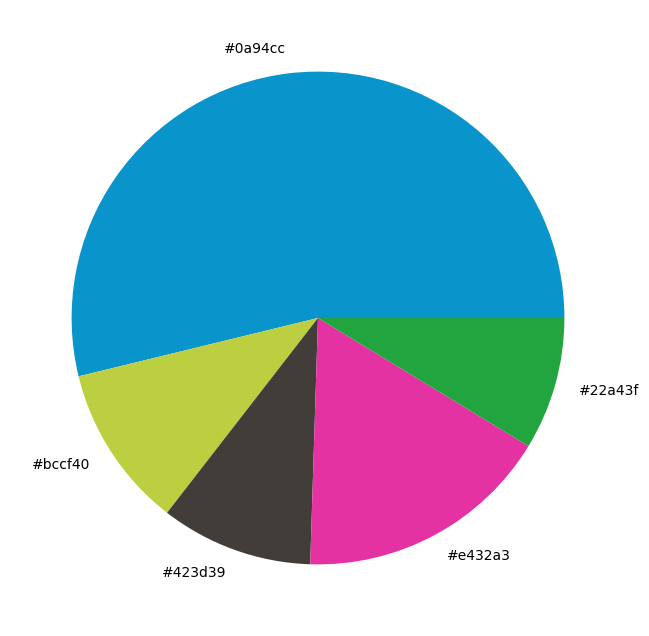

In [14]:
plt.figure(figsize=(12,8))
plt.pie(counts.values(),labels=hex_colors, colors=hex_colors)
plt.savefig(f'{img_name[:-4]}-analysis.png')

In [16]:
pip install webcolors




SyntaxError: invalid syntax (258308692.py, line 1)

In [17]:
from webcolors import hex_to_name

def convert_color_codes_to_names(color_codes):
    color_names = []
    for code in color_codes:
        try:
            color_name = hex_to_name(code)
            color_names.append(color_name)
        except ValueError:
            color_names.append("Unknown")
    return color_names

# Example list of color codes
color_codes = ['#ff0000', '#00ff00', '#0000ff', '#ffff00']

# Convert color codes to color names
color_names = convert_color_codes_to_names(color_codes)

# Print the result
for code, name in zip(color_codes, color_names):
    print(f"Color code: {code}, Color name: {name}")


ModuleNotFoundError: No module named 'webcolors'

In [18]:
import matplotlib.colors as mcolors

def convert_color_codes_to_names(color_codes):
    color_names = []
    for code in color_codes:
        try:
            color_name = mcolors.to_rgba_array(code)[0]
            color_names.append(mcolors.to_color_name(color_name))
        except ValueError:
            color_names.append("Unknown")
    return color_names

# Example list of color codes
color_codes = ['#ff0000', '#00ff00', '#0000ff', '#ffff00']

# Convert color codes to color names
color_names = convert_color_codes_to_names(color_codes)

# Print the result
for code, name in zip(color_codes, color_names):
    print(f"Color code: {code}, Color name: {name}")


AttributeError: module 'matplotlib.colors' has no attribute 'to_color_name'

In [19]:
import matplotlib.colors as mcolors

def convert_color_codes_to_names(color_codes):
    color_names = []
    for code in color_codes:
        try:
            color_name = mcolors.rgb2name(mcolors.hex2color(code))
            color_names.append(color_name)
        except ValueError:
            color_names.append("Unknown")
    return color_names

# Example list of color codes
color_codes = ['#ff0000', '#00ff00', '#0000ff', '#ffff00']

# Convert color codes to color names
color_names = convert_color_codes_to_names(color_codes)

# Print the result
for code, name in zip(color_codes, color_names):
    print(f"Color code: {code}, Color name: {name}")


AttributeError: module 'matplotlib.colors' has no attribute 'rgb2name'

In [22]:
pip install  webcolors



SyntaxError: invalid syntax (181485476.py, line 1)

In [23]:
import webcolors

def convert_color_codes_to_names(color_codes):
    color_names = []
    for code in color_codes:
        try:
            # Convert the color code to a color name
            color_name = webcolors.hex_to_name(code, spec='css3')
            color_names.append(color_name)
        except ValueError:
            # Handle invalid color codes
            color_names.append("Invalid color code")

    return color_names

# Example usage
color_codes = ["#FF0000", "#00FF00", "#0000FF"]
color_names = convert_color_codes_to_names(color_codes)

for code, name in zip(color_codes, color_names):
    print(f"Color code: {code} -> Color name: {name}")


ModuleNotFoundError: No module named 'webcolors'

In [24]:
pip install opencv-python


In [25]:
pip install webcolors

  Using cached webcolors-1.13-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
import webcolors

def convert_color_codes_to_names(color_codes):
    color_names = []
    for code in color_codes:
        try:
            # Convert the color code to a color name
            color_name = webcolors.hex_to_name(code, spec='css3')
            color_names.append(color_name)
        except ValueError:
            # Handle invalid color codes
            color_names.append("Invalid color code")

    return color_names



In [28]:
color_titles=convert_color_codes_to_names(hex_colors)


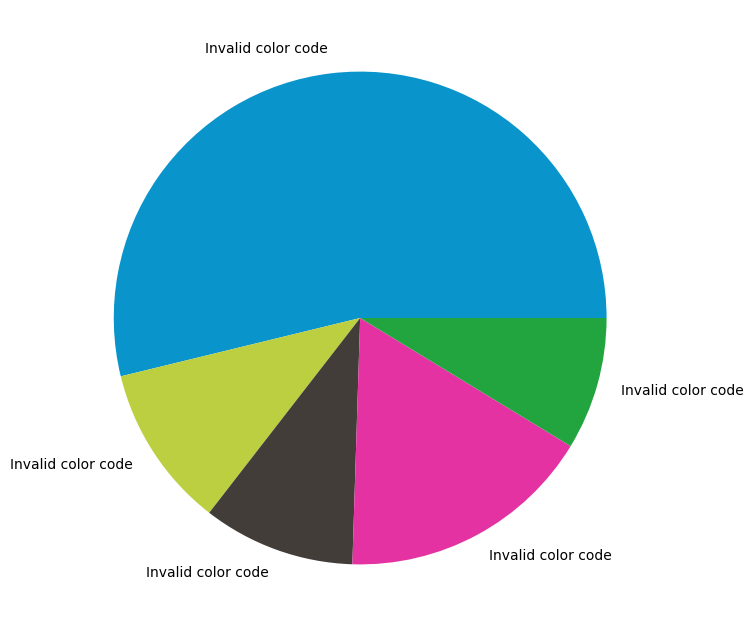

In [29]:
plt.figure(figsize=(12,8))
plt.pie(counts.values(),labels=color_titles, colors=hex_colors)
plt.savefig(f'{img_name[:-4]}-tryout.png')

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os

import seaborn as sns






In [2]:
print(os.listdir("cementing/"))





['Calcite', 'Clay', 'Hematite', 'Silica']


In [3]:
SIZE = 128

train_images = []
train_labels = [] 

for directory_path in glob.glob("cementing/*"):
    label = directory_path.split(os.path.sep)[-1]
    print(label)
    
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):

        
        print(img_path)
        
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        # Check if the image is loaded successfully
        if img is None:
            print(f"Error loading image: {img_path}")
            continue  # Skip to the next image
        
        # Resize the image
        img = cv2.resize(img, (SIZE, SIZE))
        
        # Check if the image is resized successfully
        if img.size == 0:
            print(f"Error resizing image: {img_path}")
            continue  # Skip to the next image
        
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Append the image and label to the lists
        

        train_images.append(img)
        
        train_labels.append(label)
        #print(train_images)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
       

Calcite
cementing\Calcite\46477.jpg
cementing\Calcite\9221037.jpg
cementing\Calcite\Bipyramidal Calcite.jpg
cementing\Calcite\Blue Calcite Raw.jpg
cementing\Calcite\Blue Calcite.jpg
cementing\Calcite\Botryoidal Calcite.jpg
cementing\Calcite\Calcite.jpg
cementing\Calcite\Carribean Calcite 2.jpg
cementing\Calcite\Carribean Calcite.jpg
cementing\Calcite\Clear Calcite 2.jpg
cementing\Calcite\Clear Calcite.jpg
cementing\Calcite\Dodecahedral Calcite.jpg
cementing\Calcite\Druse Calcite.jpg
cementing\Calcite\Globular Calcite.jpg
cementing\Calcite\Golden  Calcite.jpg
cementing\Calcite\Green  Calcite 3.jpg
cementing\Calcite\Green Calcite 2.jpg
cementing\Calcite\Green Calcite.jpg
cementing\Calcite\hexagonal calcite 1.jpg
cementing\Calcite\hexagonal calcite 2.jpg
cementing\Calcite\hexagonal calcite 3.jpg
cementing\Calcite\hexagonal calcite 4.jpg
cementing\Calcite\hexagonal calcite 5.jpg
cementing\Calcite\Hexagonal Calcite.jpg
cementing\Calcite\Honey Calcite Sphere.jpg
cementing\Calcite\large twin 

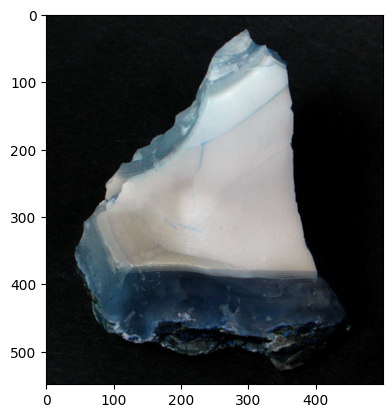

In [4]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("cemntingtest/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        plt.imshow(img)
        # Check if the image is loaded successfully
        if img is None:
            print(f"Error loading image: {img_path}")
            continue  # Skip to the next image
        
        # Resize the image
        img = cv2.resize(img, (SIZE, SIZE))
        
        # Check if the image is resized successfully
        if img.size == 0:
            print(f"Error resizing image: {img_path}")
            continue  # Skip to the next image
        
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
         
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

        
       





In [5]:
test_images




array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  6,   6,   6],
         [ 56,  56,  56],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [ 38,  38,  38],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)






In [7]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded



In [8]:
train_images



array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  6,   6,   6],
         [ 56,  56,  56],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [ 38,  38,  38],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [9]:
len(x_test)==0






False

In [10]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test /255.0
#y_train,y_test= y_train / 255.0, y_test / 255.0






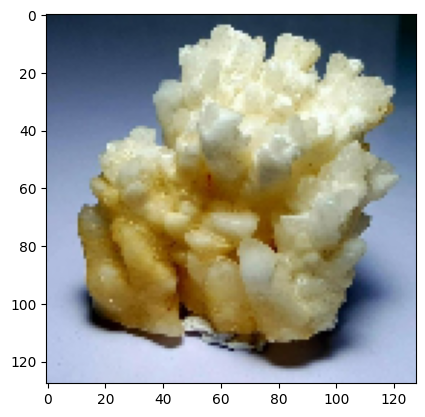

In [11]:
plt.imshow(x_test[5])

In [12]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)


y_test_one_hot = to_categorical(y_test)



In [13]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())




In [14]:
#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)


In [15]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 


 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
          

In [16]:
##########################################
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot))


Epoch 1/50
7/7 [==============================] - 12s 2s/step - loss: 1.7890 - accuracy: 0.4128 - val_loss: 1.7175 - val_accuracy: 0.2632
Epoch 2/50
7/7 [==============================] - 7s 1s/step - loss: 1.4653 - accuracy: 0.4725 - val_loss: 1.6193 - val_accuracy: 0.3509
Epoch 3/50
7/7 [==============================] - 7s 1s/step - loss: 1.1290 - accuracy: 0.5321 - val_loss: 1.5776 - val_accuracy: 0.3509
Epoch 4/50
7/7 [==============================] - 7s 1s/step - loss: 1.0200 - accuracy: 0.5092 - val_loss: 1.6507 - val_accuracy: 0.2632
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 0.9662 - accuracy: 0.5642 - val_loss: 1.5874 - val_accuracy: 0.2632
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 0.8819 - accuracy: 0.6101 - val_loss: 1.5930 - val_accuracy: 0.2632
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 0.9586 - accuracy: 0.5734 - val_loss: 1.4984 - val_accuracy: 0.2632
Epoch 8/50
7/7 [========================

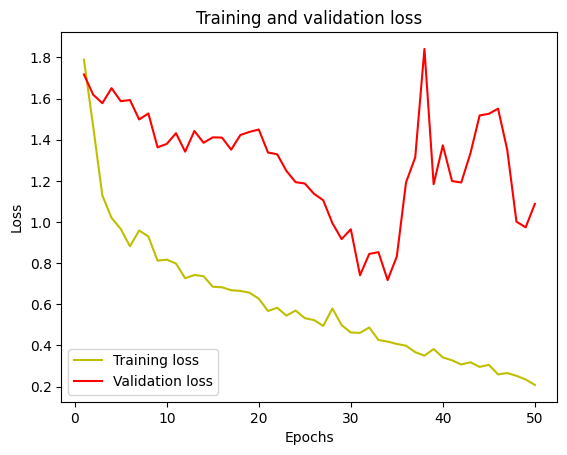

In [17]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


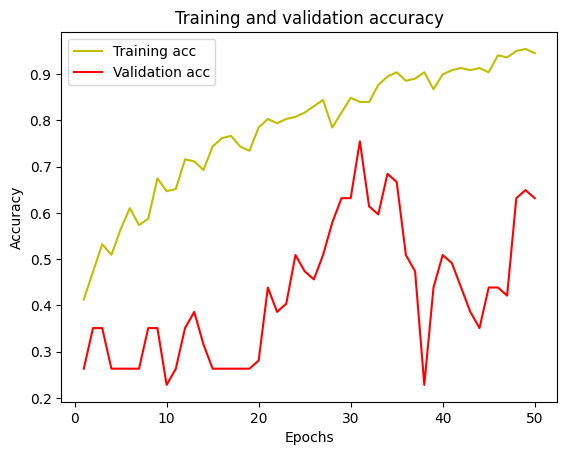

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




2/2 [==============================] - 1s 294ms/step
[[15  1  0  0]
 [ 0  6  0  0]
 [ 1 11  3  0]
 [ 3  5  0 12]]


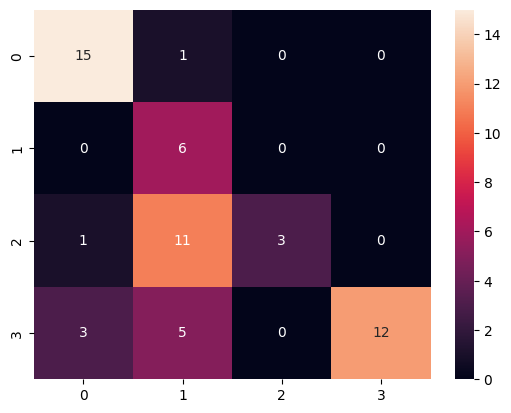

In [19]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

cnn_model.save("cnn_classifier.h5")



In [20]:
#n=5 dog park. NN not as good as RF.
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
cv2.imshow("hi",img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])



1/1 [==============================] - 0s 46ms/step
The prediction for this image is:  ['Calcite']
The actual label for this image is:  Calcite


In [21]:
################################
#Now, let us use features from convolutional network for RF
X_for_RF = feature_extractor.predict(x_train) #This is out X input to RF


7/7 [==============================] - 3s 404ms/step


In [22]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)


In [23]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding




RandomForestClassifier(n_estimators=50, random_state=42)

In [24]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

2/2 [==============================] - 1s 331ms/step


In [25]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))




Accuracy =  1.0


['rf_classifier.joblib']

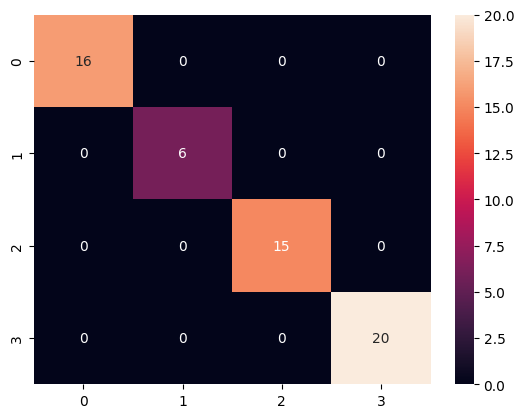

In [26]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)
import joblib
joblib.dump(RF_model, "rf_classifier.joblib")



1/1 [==============================] - 0s 30ms/step
The prediction for this image is:  ['Hematite']
The actual label for this image is:  Hematite


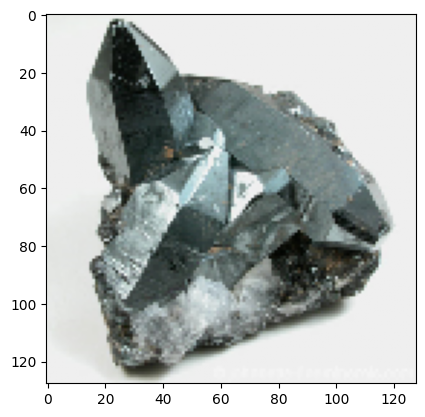

: 

In [27]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=28 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name


print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [1]:
print(1)

1


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os

import seaborn as sns

In [3]:
print(os.listdir("luster/"))

['dull rocks', 'greasy rocks', 'shiny rocks', 'silky rocks']


In [9]:
SIZE = 128

train_images = []
train_labels = [] 

for directory_path in glob.glob("luster/*"):
    label = directory_path.split(os.path.sep)[-1]
    print(label)
    
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):

        
        print(img_path)
        
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        # Check if the image is loaded successfully
        if img is None:
            print(f"Error loading image: {img_path}")
            continue  # Skip to the next image
        
        # Resize the image
        img = cv2.resize(img, (SIZE, SIZE))
        
        # Check if the image is resized successfully
        if img.size == 0:
            print(f"Error resizing image: {img_path}")
            continue  # Skip to the next image
        
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Append the image and label to the lists

        train_images.append(img)
        
        train_labels.append(label)
        #print(train_images)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
       

dull rocks
greasy rocks
shiny rocks
silky rocks


In [8]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("lustertest/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        plt.imshow(img)
        # Check if the image is loaded successfully
        if img is None:
            print(f"Error loading image: {img_path}")
            continue  # Skip to the next image
        
        # Resize the image
        img = cv2.resize(img, (SIZE, SIZE))
        
        # Check if the image is resized successfully
        if img.size == 0:
            print(f"Error resizing image: {img_path}")
            continue  # Skip to the next image
        
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
         
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

        
       





In [7]:
test_images

array([], dtype=float64)